In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bar_chart_race as bar
from functools import reduce

In [3]:
deliveries=pd.read_csv('C:\\Users\\NOMESH\\Downloads\\Project\deliveries.csv')

matches=pd.read_csv('C:\\Users\\NOMESH\\Downloads\\Project\matches.csv')


In [4]:
data=[deliveries,matches]

In [5]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [6]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
data[1].rename(columns={'id':'match_id'},inplace=True)

In [8]:
merge_deliveries_matches_data=pd.merge(data[0],data[1],on='match_id')

In [9]:
merge_deliveries_matches_data['date']= pd.to_datetime(merge_deliveries_matches_data['date'])

In [10]:
#analyzing disnissal kind column so we we can extract those wickets that will be count in bowler stats
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [11]:
#extracting only those dismissal kind that will be considered as bowler wicket
dismisal_kind=['caught','bowled','lbw','caught and bowled','stumped','hit wicket']

In [13]:
#find inning in which bowler have bowled
bowler_innings=deliveries.groupby(['bowler']).agg({'match_id':'nunique'})

bowler_innings.rename(columns={'match_id':'innings'},inplace=True)

In [11]:
bowler_wickets=pd.DataFrame(deliveries[deliveries.dismissal_kind.isin(dismisal_kind)].groupby('bowler')['player_dismissed'].count())

In [12]:
bowler_runs=pd.DataFrame(deliveries.groupby('bowler')['total_runs'].sum())

In [13]:
over_bowled_by_bowler=(pd.DataFrame(deliveries[(deliveries['wide_runs']==0)&(deliveries['noball_runs']==0)]
                                    .groupby('bowler')['ball'].count()))

In [14]:
multiple_dataFrame_of_bowlers=[bowler_innings,over_bowled_by_bowler,bowler_runs,bowler_wickets]

In [15]:
bowler_stats=(reduce(lambda  left,right: pd.merge(left,right,left_index=True, right_index=True,how='outer'),
                     multiple_dataFrame_of_bowlers))

In [16]:
bowler_stats['wickets']=bowler_stats['player_dismissed']
bowler_stats.drop('player_dismissed',axis=1,inplace=True)

In [17]:
bowler_stats['wickets']=bowler_stats['wickets'].fillna(0).astype(int)

In [18]:
bowler_stats['over']=(bowler_stats['ball']//6)+((bowler_stats['ball']%6)/10)
bowler_stats['average']=bowler_stats['total_runs']/bowler_stats['wickets']

bowler_stats['economy']=bowler_stats['total_runs']/bowler_stats['over']

In [19]:
top_10_bowler_by_wickets=bowler_stats.sort_values('wickets',ascending=False)[:10]

Text(0.5, 0, 'Bowler Name')

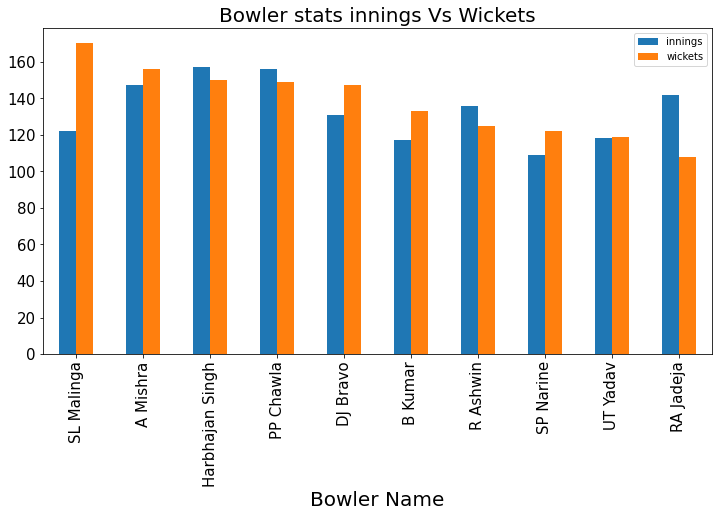

In [24]:
top_10_bowler_by_wickets[['innings','wickets']].plot.bar(rot=90,figsize=(12,6),fontsize=15)
plt.title('Bowler stats innings Vs Wickets',fontsize=20)
plt.xlabel('Bowler Name',fontsize=20)

Text(0.5, 0, 'Bowler Name')

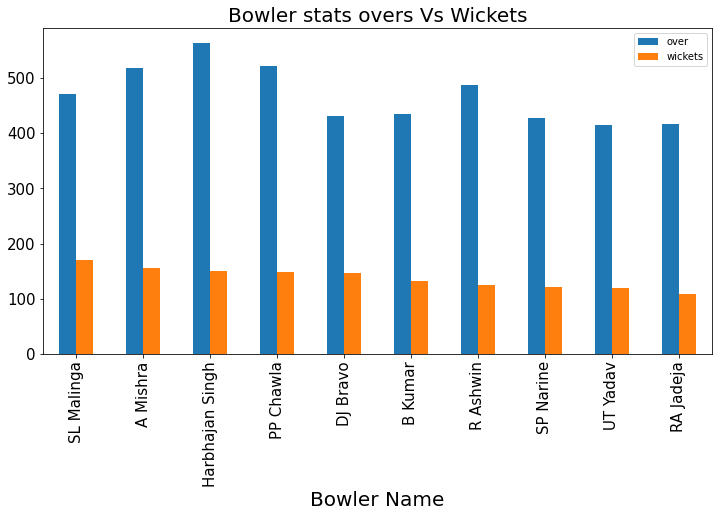

In [25]:
top_10_bowler_by_wickets[['over','wickets']].plot.bar(rot=90,figsize=(12,6),fontsize=15)
plt.title('Bowler stats overs Vs Wickets',fontsize=20)
plt.xlabel('Bowler Name',fontsize=20)


Text(0.5, 0, 'Bowler Name')

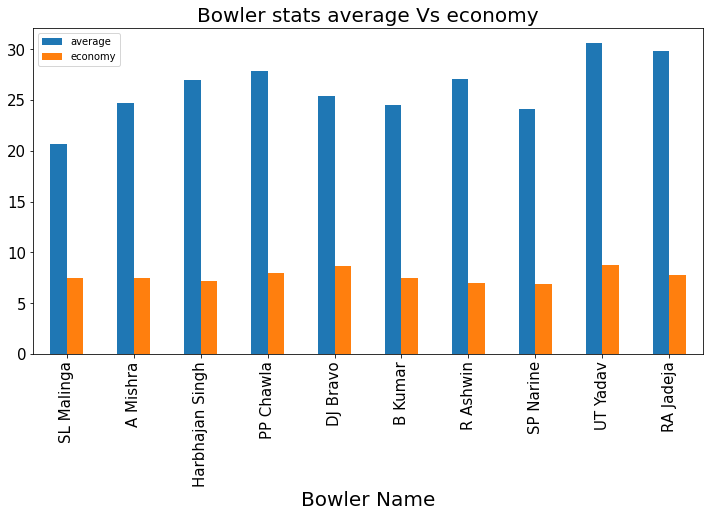

In [27]:
top_10_bowler_by_wickets[['average','economy']].plot.bar(rot=90,figsize=(12,6),fontsize=15)
plt.title('Bowler stats average Vs economy',fontsize=20)
plt.xlabel('Bowler Name',fontsize=20)

# Creating a compatible dataset to create barchart race
# the fromat required to use bar chart race is:
# each row is represented by index which have a unique date, the value of next row should be equal to current row+next row

# for example if we have a column a=0,2,5,3,6,3,1 
# then we have to make it as 0,2,7,10,16,19,20

In [29]:
bowler_runs_by_date=(merge_deliveries_matches_data.groupby(['bowler','date'])['total_runs'].
                      sum().reset_index().sort_values(by='date',axis=0).reset_index().drop('index',axis=1))

In [30]:
bowler_runs_by_date.head()

bowler       date  total_runs
0  Shahid Afridi 2008-01-05          28
1     SK Trivedi 2008-01-05          31
2      DNT Zoysa 2008-01-05          33
3       I Sharma 2008-01-05          28
4     AB Agarkar 2008-01-05          46

In [31]:
bowlers=merge_deliveries_matches_data['bowler'].unique()

In [32]:
bowler_runs_by_date_copy=bowler_runs_by_date.copy()

In [33]:
for bowler in bowlers:
    bowler_runs_by_date_copy[bowler]=bowler_runs_by_date[bowler_runs_by_date['bowler']==bowler]['total_runs']

In [34]:
bowler_runs_by_date_copy.drop(['bowler','total_runs'],axis=1,inplace=True)

In [35]:
bowler_runs_by_date_copy=bowler_runs_by_date_copy.groupby('date').aggregate(np.sum)

In [36]:
rows = bowler_runs_by_date_copy.shape[0]
for row in range(1,rows):
    bowler_runs_by_date_copy.iloc[row] = bowler_runs_by_date_copy.iloc[row] + bowler_runs_by_date_copy.iloc[row-1]

In [37]:
bowler_runs_by_date_copy.tail()

TS Mills  A Choudhary  YS Chahal  S Aravind  SR Watson  TM Head  \
date                                                                          
2019-10-04     157.0        144.0     2416.0     1057.0     2751.0     81.0   
2019-10-05     157.0        144.0     2416.0     1057.0     2751.0     81.0   
2019-11-04     157.0        144.0     2416.0     1057.0     2751.0     81.0   
2019-12-04     157.0        144.0     2416.0     1057.0     2751.0     81.0   
2019-12-05     157.0        144.0     2416.0     1057.0     2751.0     81.0   

            STR Binny  A Nehra  B Kumar  BCJ Cutting  ...  S Midhun  R Parag  \
date                                                  ...                      
2019-10-04      767.0   2537.0   3264.0        434.0  ...      32.0     97.0   
2019-10-05      767.0   2537.0   3264.0        434.0  ...      32.0     97.0   
2019-11-04      767.0   2537.0   3264.0        434.0  ...      32.0    121.0   
2019-12-04      767.0   2537.0   3264.0        434.0  ...      32.0    121.0   
2019-12-05      767.0   2537.0   3264.0        434.0  ...      32.0    121.0   

            L Livingstone  SN Khan  S Rutherford  H Brar  P Raj  O Thomas  \
date                                                                        
2019-10-04           13.0      6.0          66.0    48.0   60.0      94.0   
2019-10-05           13.0      6.0          66.0    48.0   60.0      94.0   
2019-11-04           13.0      6.0          66.0    48.0   60.0      94.0   
2019-12-04           13.0      6.0          66.0    48.0   60.0      94.0   
2019-12-05           13.0      6.0          66.0    48.0   60.0      94.0   

            A Roy  S Warrier  
date                          
2019-10-04   14.0       88.0  
2019-10-05   14.0       88.0  
2019-11-04   14.0       88.0  
2019-12-04   14.0       88.0  
2019-12-05   14.0       88.0  

[5 rows x 405 columns]

In [49]:
bar.bar_chart_race(bowler_runs_by_date_copy, n_bars=10)

C:\Users\NOMESH\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NOMESH\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NOMESH\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NOMESH\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NOMESH\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NOMESH\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 132 missing from current